In [1]:
import io
import urllib.request

import numpy as np

from astropy import units as u
from astropy import table, coordinates, time
from astropy.coordinates import SkyCoord

from matplotlib import pyplot as plt

In [2]:
url = 'https://github.com/bersavosh/GC_cat/raw/refs/heads/master/gc_cat.fits'
gcs = table.Table.read(io.BytesIO(urllib.request.urlopen(url).read()), format='fits')

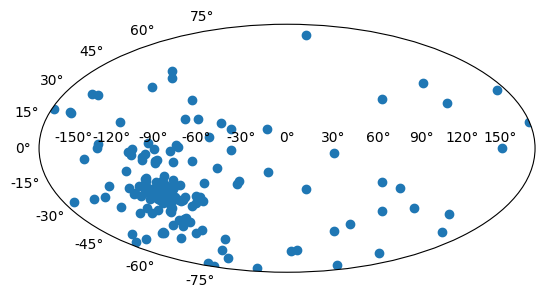

In [3]:
gcs['coord'] = coord = SkyCoord(gcs['RA'], gcs['Dec'], unit=(u.hour,u.deg))
plt.subplot(projection='hammer')
plt.scatter(gcs['coord'].ra.wrap_at(180*u.deg).rad, gcs['coord'].dec.rad)

In [4]:
subaru = coordinates.EarthLocation.of_site('Subaru')

In [5]:
now = time.Time.now()
aa = coordinates.AltAz(obstime=now, location=subaru)

%timeit coord.transform_to(aa)

1.69 ms ± 343 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
now = time.Time.now()
aa = coordinates.AltAz(obstime=now, location=subaru)
altazsnow = coord.transform_to(aa)

In [7]:
nsamples = 100
ts = now + np.linspace(0, 0.5, nsamples).reshape(nsamples, 1)*u.day
aa = coordinates.AltAz(obstime=ts, location=subaru)
altaxsset = coord.transform_to(aa)
altaxsset.alt.shape

(100, 157)

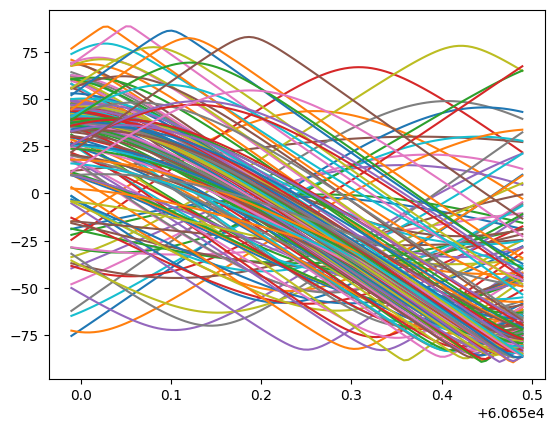

In [8]:
plt.plot(ts.mjd, altaxsset.alt);

In [9]:
%%timeit

nsamples = 100
ts = now + np.linspace(0, 0.5, nsamples).reshape(nsamples, 1)*u.day
aa = coordinates.AltAz(obstime=ts, location=subaru)
altaxsset = coord.transform_to(aa)

12.6 ms ± 189 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit

nsamples = 200
ts = now + np.linspace(0, 0.5, nsamples).reshape(nsamples, 1)*u.day
aa = coordinates.AltAz(obstime=ts, location=subaru)
altaxsset = coord.transform_to(aa)

22.8 ms ± 653 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
